In [1]:
import pandas as pd
import geopandas as gpd 

import seaborn as sns 
import folium 

from matplotlib import pyplot as plt

from datetime import datetime

In [2]:
sheet = pd.read_html('https://docs.google.com/spreadsheets/u/2/d/e/2PACX-1vRwAqp96T9sYYq2-i7Tj0pvTf6XVHjDSMIKBdZHXiCGGdNC0ypEU9NbngS8mxea55JuCFuua1MUeOj5/pubhtml#')

tests_state = sheet[1]

tests_state.columns = tests_state.iloc[0]

tests_state = tests_state.drop([0, 1])

tests_state = tests_state.drop(1.0, axis=1)

In [3]:
tests_state.head()

,State,Positive,Negative,Pending,Hospitalized,Death,Total,Last update (ET),Check time (ET)
2,AK,143,4879,NaN,9,3,5022,4/01 19:00,4/02 11:06
3,AL,1116,7503,NaN,NaN,32,8619,4/02 00:00,4/02 10:54
4,AR,624,7836,NaN,90,10,8460,4/01 20:20,4/01 23:56
5,AS,0,20,6,NaN,0,26,3/30 23:00,4/01 14:17
6,AZ,1413,19645,NaN,149,29,21058,4/01 00:00,4/02 10:19


In [4]:
state_names = pd.read_html('https://developers.google.com/public-data/docs/canonical/states_csv')[0]

In [5]:
states = gpd.read_file('gz_2010_us_040_00_5m.json')

In [6]:
states = states.merge(state_names, right_on='name', left_on='NAME')

In [7]:
states.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,latitude,longitude,name
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",AL,32.318231,-86.902298,Alabama
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752...",AK,63.588753,-154.493062,Alaska
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",AZ,34.048928,-111.093731,Arizona
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",AR,35.201050,-91.831833,Arkansas
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",CA,36.778261,-119.417932,California


In [8]:
tests = states.merge(tests_state, left_on='state', right_on='State')

tests.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,latitude,longitude,name,State,Positive,Negative,Pending,Hospitalized,Death,Total,Last update (ET),Check time (ET)
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",AL,32.318231,-86.902298,Alabama,AL,1116,7503,NaN,NaN,32,8619,4/02 00:00,4/02 10:54
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752...",AK,63.588753,-154.493062,Alaska,AK,143,4879,NaN,9,3,5022,4/01 19:00,4/02 11:06
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",AZ,34.048928,-111.093731,Arizona,AZ,1413,19645,NaN,149,29,21058,4/01 00:00,4/02 10:19
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",AR,35.201050,-91.831833,Arkansas,AR,624,7836,NaN,90,10,8460,4/01 20:20,4/01 23:56
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",CA,36.778261,-119.417932,California,CA,8155,22883,59100,1855,171,90138,4/01 00:00,4/02 09:46


In [9]:
tests[['Positive', 'Negative', 'Total']] = tests[['Positive', 'Negative', 'Total']].apply(pd.to_numeric, axis=1)

In [10]:
tests['positive_ratio'] = tests['Positive'] / tests['Total']

In [11]:
tests.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
tests = tests.to_crs(epsg=2163)

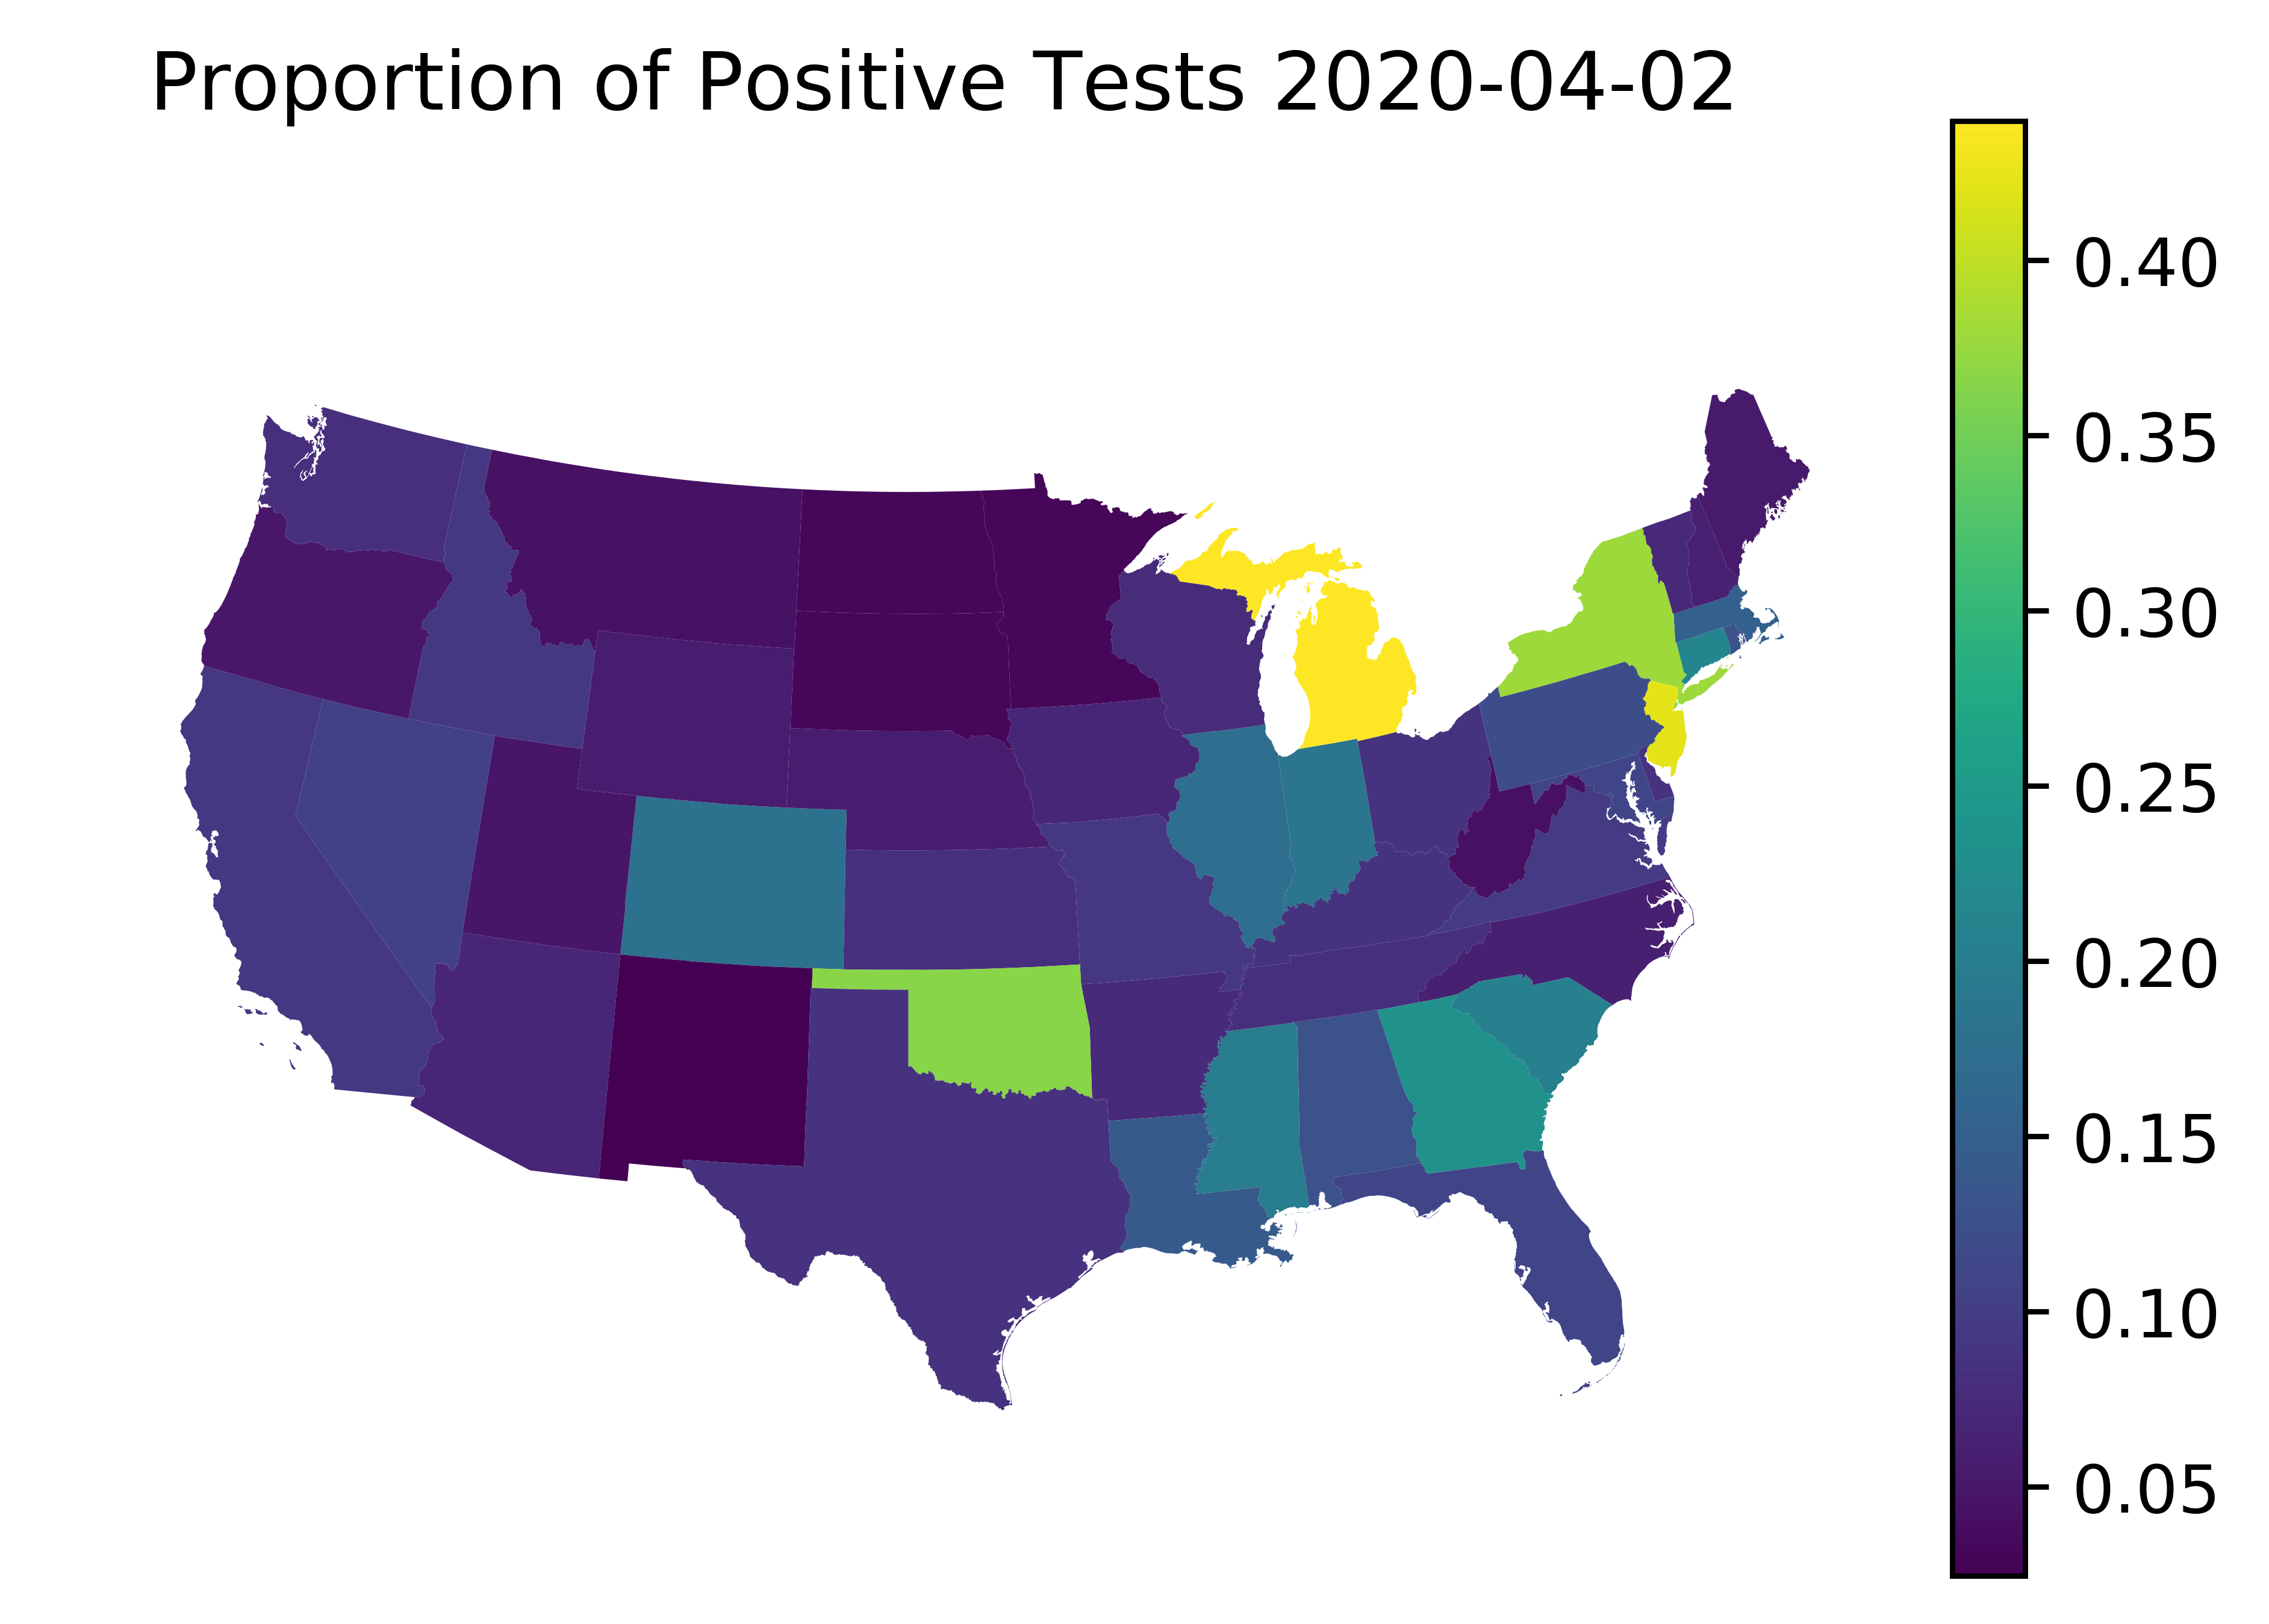

In [13]:
today = datetime.today().isoformat()[:10]

fig, ax = plt.subplots(dpi=800)

ax.axis('off')

ax.set_xlim(-2400000, 2600000)
ax.set_ylim(-2500000, 1400000)

ax.set_title(f'Proportion of Positive Tests {today}')

tests.plot(column='positive_ratio', ax=ax, legend=True)

plt.savefig(f'figs/us_positive_tests_{today}.png')

In [14]:
tests.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,latitude,longitude,name,State,Positive,Negative,Pending,Hospitalized,Death,Total,Last update (ET),Check time (ET),positive_ratio
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((1145349.139 -1553105.505, 1149...",AL,32.318231,-86.902298,Alabama,AL,1116,7503,NaN,NaN,32,8619,4/02 00:00,4/02 10:54,0.129481
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-3671340.791 2756346.929, -367...",AK,63.588753,-154.493062,Alaska,AK,143,4879,NaN,9,3,5022,4/01 19:00,4/02 11:06,0.028475
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-1111065.933 -805474.753, -1110710.3...",AZ,34.048928,-111.093731,Arizona,AZ,1413,19645,NaN,149,29,21058,4/01 00:00,4/02 10:19,0.067100
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((557903.093 -1310326.685, 557483.643 ...",AR,35.201050,-91.831833,Arkansas,AR,624,7836,NaN,90,10,8460,4/01 20:20,4/01 23:56,0.073759
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-1942660.918 -528577.162, -194...",CA,36.778261,-119.417932,California,CA,8155,22883,59100,1855,171,90138,4/01 00:00,4/02 09:46,0.090472


In [15]:
# change column names to have nicer display in map
tests = tests.drop('State', axis=1).rename({'NAME': 'State'}, axis=1)

census = pd.read_csv('nst-est2019-alldata.csv')
tests = tests.merge(census[['NAME', 'POPESTIMATE2019']], how='left', left_on='State', right_on='NAME')
tests = tests.rename({'POPESTIMATE2019': 'Population in 2019'}, axis=1)

In [16]:
m = folium.Map(tiles='CartoDB positron',
               zoom_start=4,
               location=(39.8283, -98.5795))

In [17]:
cp = folium.Choropleth(tests,
                  data=tests, 
                  key_on='feature.properties.GEO_ID',
                  fill_color='YlOrRd', 
                  columns=['GEO_ID', 'positive_ratio'],
                  legend_name=f'Proportion of Positive Tests out of total tested, last updated {today}').add_to(m)

cp.geojson.add_child(
    folium.features.GeoJsonTooltip(['State', 'Positive', 'Negative', 'Total', 'Population in 2019'])
);

In [18]:
m.save('map.html')

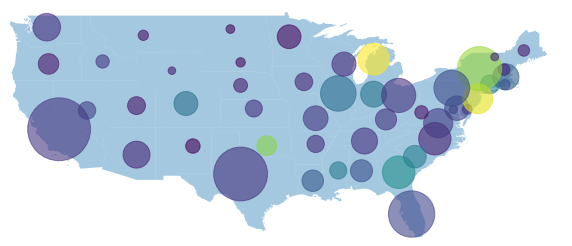

In [19]:
states_proj = states.to_crs(epsg=2163)

tests_proj = tests.copy()
tests_proj.geometry = gpd.points_from_xy(tests['longitude'], tests['latitude'])
tests_proj = tests_proj.to_crs(epsg=2163)

fig, ax = plt.subplots(figsize=(10, 10))
states.to_crs(epsg=4326).plot(alpha=0.4, linewidth=10, ax=ax)
tests_proj.plot(markersize=tests_proj['Population in 2019'] * 0.0001, 
                ax=ax, 
                cmap='viridis', 
                column='positive_ratio',
                alpha=0.6)

ax.axis('off')

ax.set_xlim(-125, -65)
ax.set_ylim(25, 50)
plt.savefig(f'figs/pop_inclusive_map_{today}.png')

In [20]:
?folium.Choropleth

Init signature:
folium.Choropleth(
    geo_data,
    data=None,
    columns=None,
    key_on=None,
    bins=6,
    fill_color='blue',
    nan_fill_color='black',
    fill_opacity=0.6,
    nan_fill_opacity=None,
    line_color='black',
    line_weight=1,
    line_opacity=1,
    name=None,
    legend_name='',
    overlay=True,
    control=True,
    show=True,
    topojson=None,
    smooth_factor=None,
    highlight=None,
    **kwargs,
)
Docstring:     
Apply a GeoJSON overlay to the map.

Plot a GeoJSON overlay on the base map. There is no requirement
to bind data (passing just a GeoJSON plots a single-color overlay),
but there is a data binding option to map your columnar data to
different feature objects with a color scale.

If data is passed as a Pandas DataFrame, the "columns" and "key-on"
keywords must be included, the first to indicate which DataFrame
columns to use, the second to indicate the layer in the GeoJSON
on which to key the data. The 'columns' keyword does not need to be


In [26]:
[i/10 for i in range(10)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [23]:
?range

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     
